In [23]:
import tensorflow as tf
import keras
import numpy as np
from tensorflow.python.framework import ops
from tf_utils import random_mini_batches
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline

In [24]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [25]:
mnist_training_images=mnist.train.images.T
mnist_training_images_labels=mnist.train.labels.T
mnist_test_images=mnist.test.images.T
mnist_test_images_labels=mnist.test.labels.T

In [26]:
def create_placeholders(n_x,n_y):
    X = tf.placeholder(tf.float32, shape=[n_x,None])
    Y = tf.placeholder(tf.float32, shape=[n_y,None])
    return X,Y

In [27]:
def initialize_parameters():
    W1 = tf.get_variable("W1",[20,784],initializer=tf.contrib.keras.initializers.he_uniform(seed=1))
    b1 = tf.get_variable("b1",[20,1],initializer=tf.zeros_initializer())
    W2 = tf.get_variable("W2",[20,20],initializer=tf.contrib.keras.initializers.he_uniform(seed=1))
    b2 = tf.get_variable("b2",[20,1],initializer=tf.zeros_initializer())
    W3 = tf.get_variable("W3",[20,20],initializer=tf.contrib.keras.initializers.he_uniform(seed=1))
    b3 = tf.get_variable("b3",[20,1],initializer=tf.zeros_initializer())
    W4 = tf.get_variable("W4",[10,20],initializer=tf.contrib.keras.initializers.he_uniform(seed=1))
    b4 = tf.get_variable("b4",[10,1],initializer=tf.zeros_initializer())
    parameters = {   "W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3,
                   "W4":W4,
                   "b4":b4   }
    return parameters


In [28]:
def forward_propogation(X,parameters):
     W1 = parameters['W1']
     b1 = parameters['b1']
     W2 = parameters['W2']
     b2 = parameters['b2']
     W3 = parameters['W3']
     b3 = parameters['b3']
     W4 = parameters['W4']
     b4 = parameters['b4']
     Z1 = tf.add(tf.matmul(W1,X),b1)  
     A1=tf.nn.elu(Z1)                    # Using ELU as the activation function in all the layers
     Z2 = tf.add(tf.matmul(W2,A1),b2)
     A2=tf.nn.elu(Z2)
     Z3 = tf.add(tf.matmul(W3,A2),b3)
     A3=tf.nn.elu(Z3)
     Z4 = tf.add(tf.matmul(W4,A3),b4)
     return Z4

In [29]:
def compute_cost(Z4,Y):
    logits = tf.transpose(Z4)
    labels = tf.transpose(Y)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=labels))
    return cost

In [33]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.01,
          num_epochs = 300, minibatch_size = 64, print_cost = True):
    
    ops.reset_default_graph()                         
    tf.set_random_seed(1)                         
    seed = 3                                         
    (n_x, m) = X_train.shape                         
    n_y = Y_train.shape[0]                           
    elu_costs = []                                        
    
    X,Y=create_placeholders(n_x,n_y)
   
    parameters = initialize_parameters()
   
    Z4 =forward_propogation(X,parameters)
   
    cost = compute_cost(Z4,Y)
  
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
  
    init = tf.global_variables_initializer()

   
    with tf.Session() as sess:

        sess.run(init)
        
       
        for epoch in range(num_epochs):

            epoch_cost = 0.                      
            num_minibatches = int(m / minibatch_size) 
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)

            for minibatch in minibatches:

               
                (minibatch_X, minibatch_Y) = minibatch
                
               
                _ , minibatch_cost = sess.run([optimizer,cost],feed_dict={X:minibatch_X,Y:minibatch_Y})
                
                epoch_cost += minibatch_cost / num_minibatches

           
            if print_cost == True and epoch % 50 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                elu_costs.append(epoch_cost)
                
       
        plt.plot(np.squeeze(elu_costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # lets save the parameters in a variable
        parameters = sess.run(parameters)
        print ("Parameters have been trained!")

        # Calculate the correct predictions
        correct_prediction = tf.equal(tf.argmax(Z4), tf.argmax(Y))

        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        train_accuracy=accuracy.eval({X: X_train, Y: Y_train})
        test_accuracy=accuracy.eval({X: X_test, Y: Y_test})
        print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
        print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
        
        return parameters,train_accuracy,test_accuracy,elu_costs

Cost after epoch 0: 1.316656
Cost after epoch 50: 0.160542
Cost after epoch 100: 0.121306
Cost after epoch 150: 0.100569
Cost after epoch 200: 0.085232
Cost after epoch 250: 0.073773


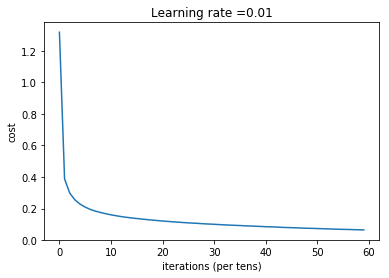

Parameters have been trained!
Train Accuracy: 0.981564
Test Accuracy: 0.9596


In [34]:
parameters,training_accuracy,test_accuracy,elu_costs = model(mnist_training_images, mnist_training_images_labels, mnist_test_images, mnist_test_images_labels)

In [82]:
print (tf.__version__)

1.2.1
